# Part I - (Ford Go-Bike Data Exploration)
## by (Chinenyenwa Ginger-Eke)

## Introduction
This data set includes information about individual rides made 
in a bike-sharing system covering the greater San Francisco 
Bay area.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [8]:
#Load the Dataset into the notebook

ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#the dataset decription;

ford_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#display the datatypes that are contained in the dataset as well. all these information will give you more insight to answer the question concerning what the structure of the data set.

ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> the dataset contains 183,412 rows whcih are entries and 16 columns which are features. virtually all the columns are of numeric type data.

### What is/are the main feature(s) of interest in your dataset?

> In this inverstigation, I want to look at the different characteristics of users. I will also be looking at the marketing strategy for subscription increase. Then to uncover if there are stations with a higher number of type of users than others. This will in turn help the company increase production in those areas, thereby further expanding their company.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start time, end time, station id, station name, and all the longitude and latitudes are the importatnt features to help me answer the questions.

In [14]:
#before we begin, check that there are no null values

ford_bike.isnull()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# the first display does not exactly give clear information as to where there are null values as much as this.
ford_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [17]:
#Also check for duplicate values

sum(ford_bike.duplicated())

0

In [20]:
#Confirm how many bikes there are in the dataset
ford_bike.bike_id.nunique()

4646

In [21]:
# To begin cleaning process, there is a need to create a copy of the dataset
ford_bike_cop = ford_bike.copy()

## Data Cleaning
 Now that we have created a copy, it is time to clean the data

In [23]:
#First, we will remove rows with na value

ford_bike = ford_bike.dropna()

In [25]:
#Check what is left of the dataset

ford_bike.shape

(174952, 16)

In [26]:
#The date data types are currenlty of float type, change them to datetime

ford_bike['start_time'] = pd.to_datetime(ford_bike['start_time'])
ford_bike['end_time'] = pd.to_datetime(ford_bike['end_time'])

In [28]:
#Change the data type of the station id and bike id from integer to string for better computation.

ford_bike['start_station_id'] = ford_bike['start_station_id'].astype(int).astype(str)
ford_bike['end_station_id'] = ford_bike['end_station_id'].astype(int).astype(str)
ford_bike['bike_id'] = ford_bike['bike_id'].astype(str)

In [29]:
# Now that we have changed the time to date time. for easier visuals (so the visuals are not cumbersome), we will use hours. convert the duration to hours
ford_bike['duration_hour'] = ford_bike['duration_sec']/3600

In [30]:
# Get the day, month, year, hour from the start and end time reference from project 2 using lambda
ford_bike['start_year'] = ford_bike['start_time'].apply(lambda x: x.year)
ford_bike['start_month'] = ford_bike['start_time'].apply(lambda x: x.month)
ford_bike['start_day'] = ford_bike['start_time'].apply(lambda x: x.day)
ford_bike['start_hour'] = ford_bike['start_time'].apply(lambda x: x.hour)
ford_bike['end_year'] = ford_bike['end_time'].apply(lambda x: x.year)
ford_bike['end_month'] = ford_bike['end_time'].apply(lambda x: x.month)
ford_bike['end_day'] = ford_bike['end_time'].apply(lambda x: x.day)
ford_bike['end_hour'] = ford_bike['end_time'].apply(lambda x: x.hour)

In [31]:
# Create a Function to get the month name from the month number created above
def get_month_name(month):
    list_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return(list_months[month-1])

In [33]:
# Add a new column to the dataset which will contain month name
ford_bike['start_month_name'] = ford_bike['start_month'].apply(lambda month: get_month_name(month))
ford_bike['end_month_name'] = ford_bike['end_month'].apply(lambda month: get_month_name(month))

In [34]:
# Let's see if the operation worked
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_year,start_month,start_day,start_hour,end_year,end_month,end_day,end_hour,start_month_name,end_month_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,2019,2,28,17,2019,3,1,8,Feb,Mar
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,2019,2,28,12,2019,3,1,5,Feb,Mar
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,2019,2,28,17,2019,3,1,4,Feb,Mar
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,2019,2,28,23,2019,3,1,0,Feb,Mar
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,2019,2,28,23,2019,3,1,0,Feb,Mar


In [35]:
#Now let us ceck the info again to be sure all changes were effected

ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

## Univariate Exploration

> Average Bike trips per second using durtion_sec variable

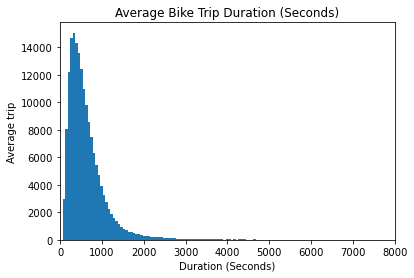

In [38]:
#Plotting of the average trip duration as a main variable.

bin_edges = np.arange(0, ford_bike['duration_sec'].max() + 100 , 60)
plt.hist(data = ford_bike , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Average trip');

There are approximately about 14,000 bike trips held at an average of 4900 seconds. which automatically translates to about 14,000 rides per 81 minutes

## Number of Customers vs Number of Subscribers

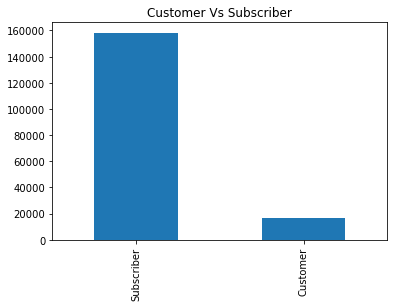

In [41]:
# This is gotten from the user-type variable

ford_bike.user_type.value_counts().plot(kind='bar')
plt.title('Customer Vs Subscriber');

The graph above shows that there are almost 7 times more subscribers than customers

## Number of bike rides per Day

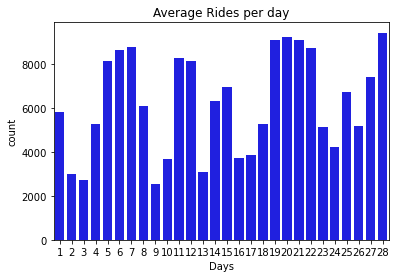

In [47]:
# This is simply protraying the bike rides done in first graph in a daily way since virtually all rides were done in February
sb.countplot(data=ford_bike,x='start_day', color='b')
plt.title('Average Rides per day');
plt.xlabel('Days');

The graph shows that the highest number of rides happened on the 28th of February while the lowest number of rides happenedon the 9th

## Most Popular Stations

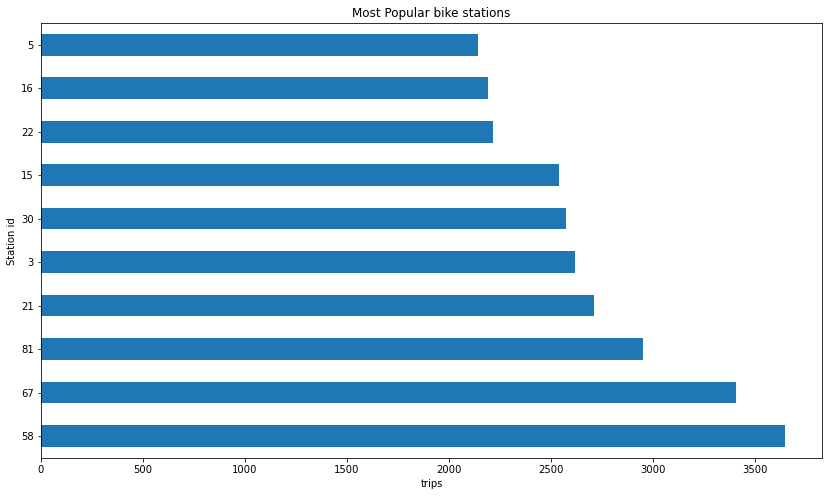

In [53]:
# Bar plot with the top 10 most popular start stations by number of trips
ford_bike.start_station_id.value_counts().head(10).plot(kind='barh', figsize=(14,8))
plt.title('Most Popular bike stations')
plt.xlabel('trips')
plt.ylabel('Station id');

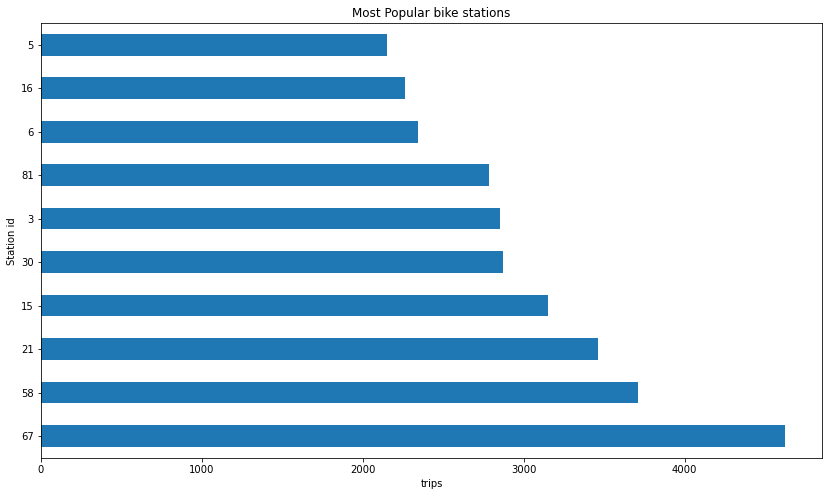

In [54]:
# Bar plot with the top 10 most popular end stations
ford_bike.end_station_id.value_counts().head(10).plot(kind='barh', figsize=(14,8))
plt.title('Most Popular bike stations')
plt.xlabel('trips')
plt.ylabel('Station id');

From the graph above, it is obvious that the most popular star and end stations are 58 and 67. To futher burtress this, Looking at the number of trips that took off from 67 is way lower than the number that actually did end at 67 and 58. This goes to show that more rides arrive at these stations even thoguh they had not taken off from same.

In [55]:
# Number of unique stations
ford_bike.start_station_id.nunique(), ford_bike.end_station_id.nunique()

(329, 329)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the graphs plotted above, stations 58 and 67 seem to be more popular and frequesn than others

There were more rides on the 28th than any other day and there are even more subscribers than customers.

Yes, there was a need for transformation during my cleaning process. I transformed the data types and removed null values which changed the shape of the dataset

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> First, I dropped rows that contained null values

Then I changed the data types of the columns:

I changed the start tme and end time format to date
changed start_station_id, end_station_id and bike_id from float to a string

Also, I have created a new column with the month name for the start and end month.

Finally, I have extracted the year, month, day and hour from the start and end date.

## Bivariate Exploration

in this section, we unveil the relationship between average bike ride time and days in February

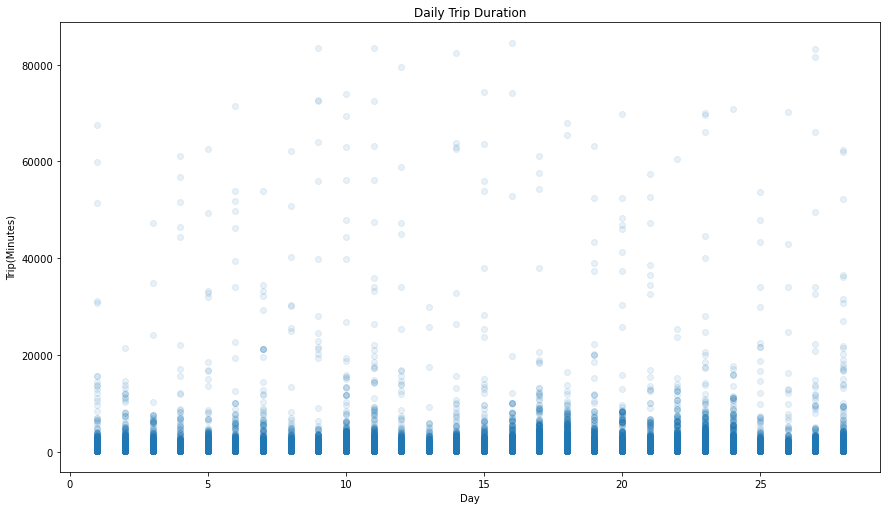

In [62]:
# Now check the bike ride duration for each month
plt.figure(figsize=[14.70, 8.27])
plt.scatter(data = ford_bike , x = 'start_day' , y = 'duration_sec' , alpha = 0.1 )
plt.title('Daily Trip Duration')
plt.xlabel('Day')
plt.ylabel('Trip(Seconds)');

There was a surprisingly consistent minimum of bike trips throughout the month, always just below 20000 seconds (333 minutes). We saw longer trips between 10th, 9th, 27th and 28th while other days had fewer trips that lasted as long.

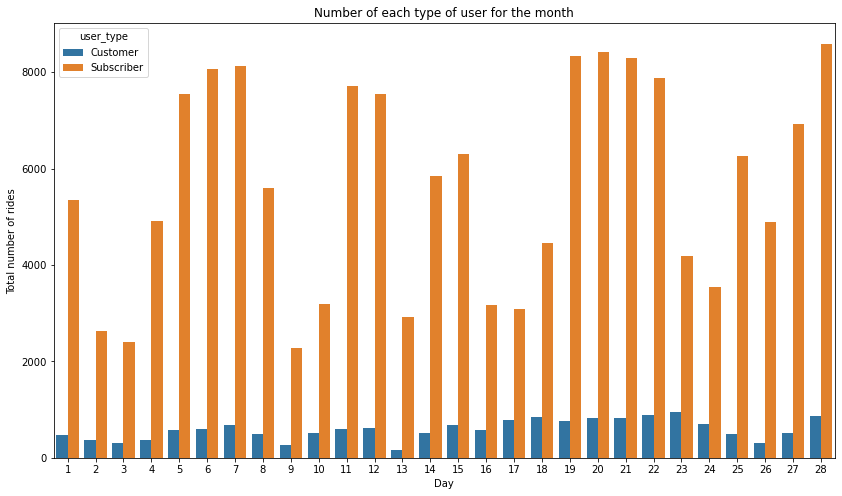

In [69]:
# Plot a countplot using the library Seaborn
plt.figure(figsize=(14,8));
sb.countplotC;
plt.xlabel('Day');
plt.ylabel('Total number of rides');
plt.title('Number of each type of user for the month');
plt.show()

The number of subscribers are consistenly higher than the number of customer everyday of the month. However, on the 23rd, there seemed to be more customers than other days

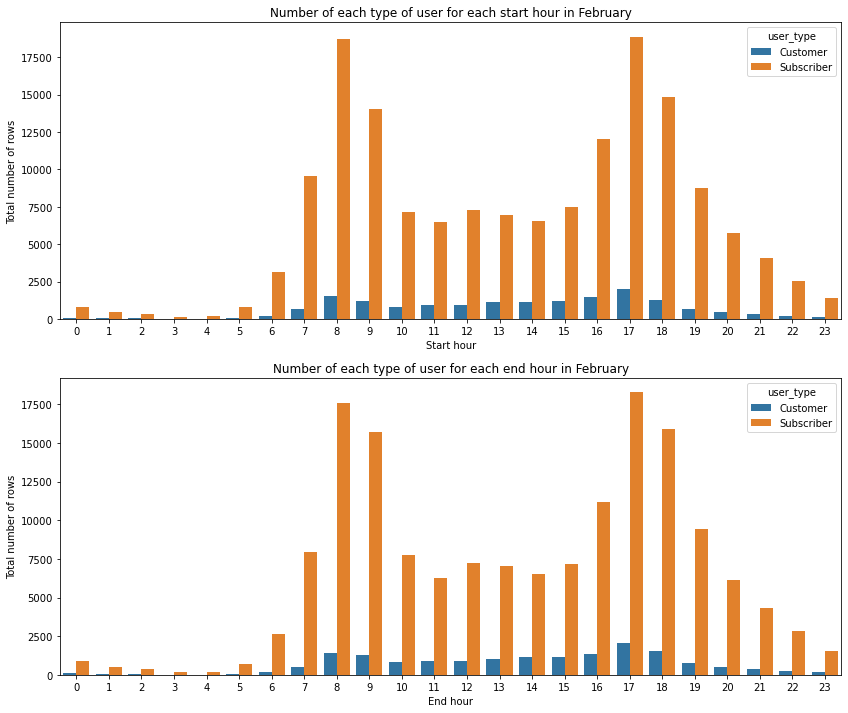

In [70]:
# Plot a countplot using the library Seaborn
fig, ax = plt.subplots(nrows=2, figsize = [14,12])
sb.countplot(data = ford_bike.query('start_month == 2'), x = 'start_hour', hue = 'user_type', ax = ax[0]);
sb.countplot(data = ford_bike.query('start_month == 2'), x = 'end_hour', hue = 'user_type', ax = ax[1]);
ax[0].set_xlabel('Start hour');
ax[0].set_ylabel('Total number of rows');
ax[0].set_title('Number of each type of user for each start hour in February');
ax[1].set_xlabel('End hour');
ax[1].set_ylabel('Total number of rows');
ax[1].set_title('Number of each type of user for each end hour in February');
plt.show()

In this case, as we saw before, there is a high demand at 1700 and 1800 also at 8 and 9 am. Basically when the people start and end of the work. If we look on the subscribers and customers, we can see that there are more customers using it at the afternoon compared on the moorning.

In [72]:
# List with the top 10 start stations; Once I have the list I can plot the amount of rides for each day of the top 10 stations in February
list_top10_start_stations = ford_bike.query('start_month == 2').start_station_id.value_counts()[0:10].reset_index()['index']

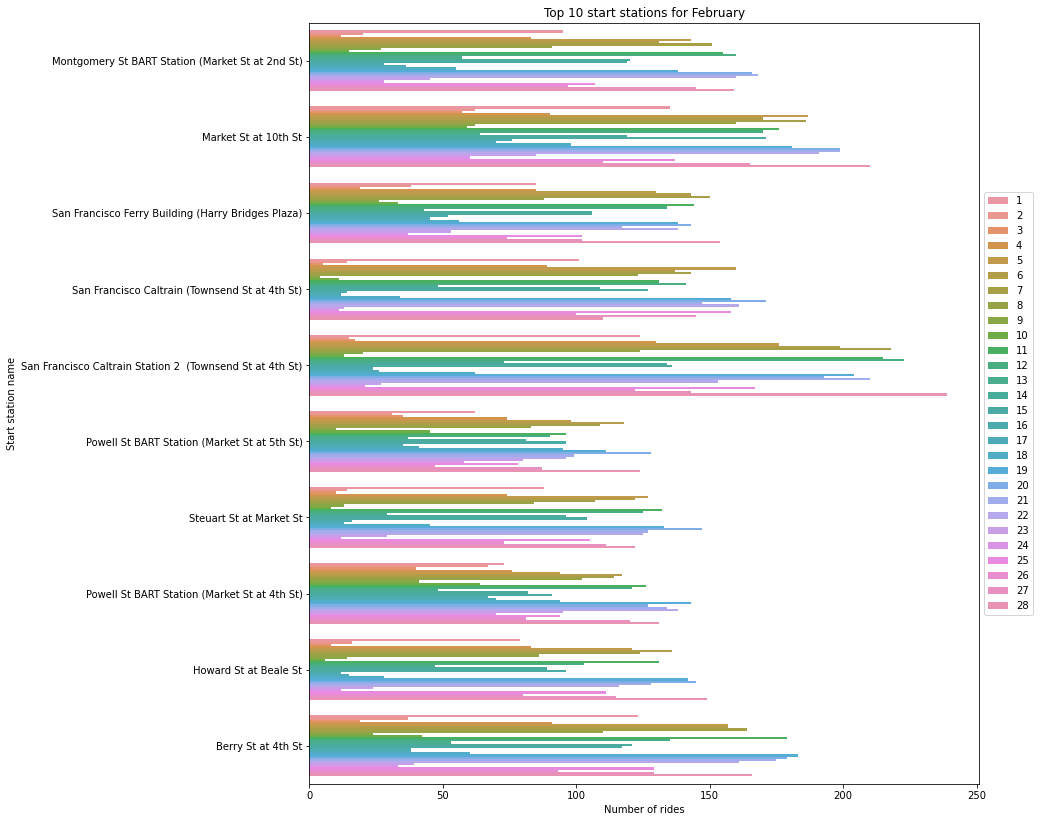

In [74]:
plt.figure(figsize=(12,14));
sb.countplot(data=ford_bike.query('(start_month == 2) and (start_station_id in @list_top10_start_stations)'), y='start_station_name',\
              hue='start_day');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
plt.title('Top 10 start stations for February');
plt.ylabel('Start station name');
plt.xlabel('Number of rides');

Virtually all the stations have more rides towards the end of the month. This could mean that people have more time to ride during these times.

In [100]:
# Count the number of start rides in each station for each type of customer
df = ford_bike.query('start_month == 2').groupby(['start_station_id', 'user_type'])['bike_id'].count().reset_index()

In [101]:
# Pivot the dataframe to put each type of user in a column
df = df.pivot(index='start_station_id',columns='user_type').reset_index()

In [102]:
# Calculate the stations in where the amount of customers is higher than the subscribers
df['more_customers'] = df.bike_id.Customer > df.bike_id.Subscriber

In [103]:
# Save the list with the stations id with more customers than subscribers
list_stations_more_customers = df[df.more_customers].start_station_id

In [106]:
list_stations_more_customers

Series([], Name: start_station_id, dtype: object)

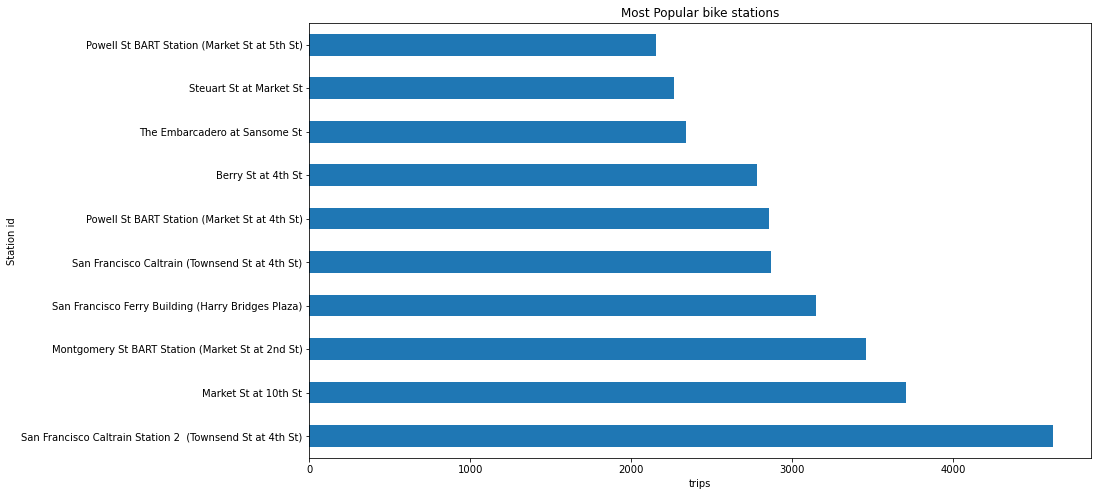

In [124]:
#The list seems empty, so let's just visualize the number of customers in a particular station

ford_bike.end_station_name.value_counts().head(10).plot(kind='barh', figsize=(14,8))
plt.title('Most Popular bike stations')
plt.xlabel('trips')
plt.ylabel('Station id');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the case of the most popular stations, I saw that there are 2 stations (San Francisco Caltrain Station 2 (Townsend ST at 4th St) and The Market St at 10th St where the amount of Customers is quite high compared to the Subscribers. I think in this stations could be interesstion to prompote more and try to increase the number of Subscribers in this stations.

Related to the main question, I found that 2 stations in where the number of Customers is higher compared to the number of Subscribers. In this stations I think it can be a good oportunity for the company to increase the number of subscribers.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, the tiime of the day that more people come to ride are towards the evening and early in the mornings.

## Multivariate Exploration

Looking at the relationship between many features and user type.

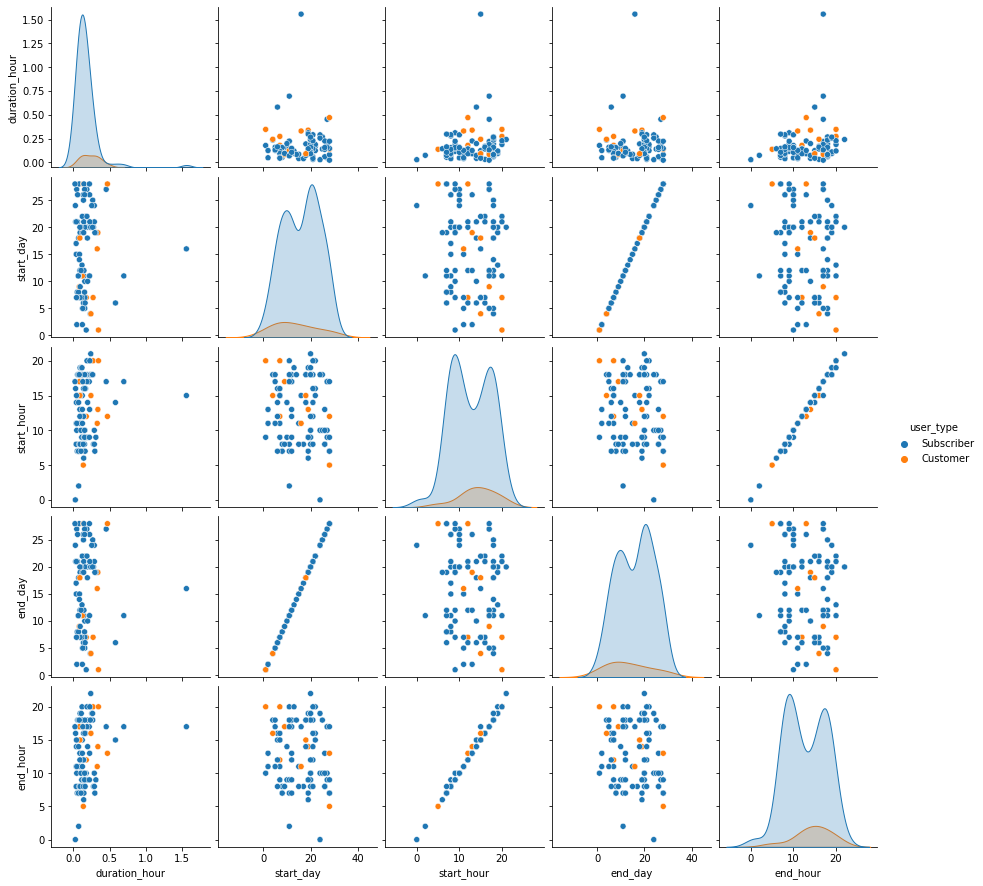

In [127]:
# To generate a plot with not a lot of problems in the performance we take a sample of 100 from the orignal dataframe
pairplot_df = ford_bike.query('start_month == 2')[['bike_id','duration_hour','start_day','start_hour', \
                                                     'end_day', 'end_hour', 'user_type']].sample(100)

sb.pairplot(pairplot_df, hue = 'user_type');

We can see there is a larger cluster of customer use towards the end of each day than in the middle of the day.

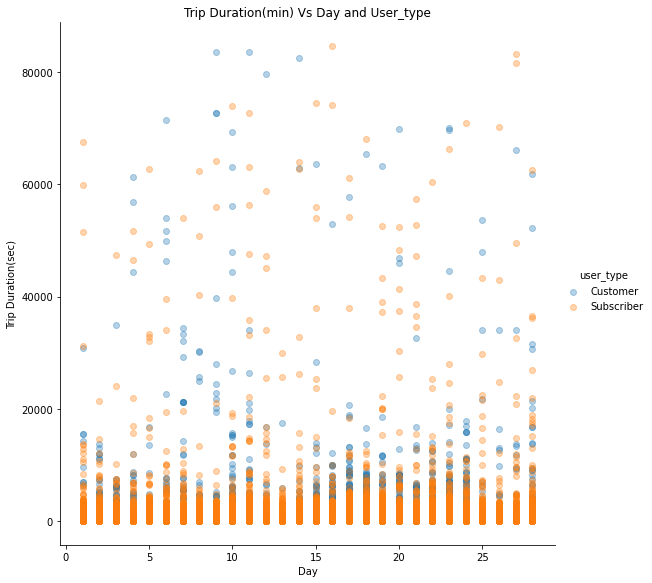

In [129]:
# Finding out how the average trip time is affected by user type and day using facetgrid.
g = sb.FacetGrid(data =  ford_bike, hue = 'user_type', height = 8)
g.map(plt.scatter, 'start_day','duration_sec', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Vs Day and User_type')
plt.xlabel('Day')
plt.ylabel('Trip Duration(sec)');

Users who are subscriber have more trips on the whole than those who are customers. Customers have longer journeyS in terms of seconds, while the subscribers have minimum duration raning within the 20000s in a day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I can see that the amount of riders are increased towards the end of the month and towards the end of the day for each day. I will reccommend the company builds a strategy around campaigns that will focus on offerings for month end to attract even more riders

### Were there any interesting or surprising interactions between features?

> It is interesting how the minroity (in this case the customers have longer ride times than the majority). I also saw that the customers seem to have higher bike ids

## Conclusions

in conclusion, the data and visuals above point to the fact that there is a huge relationship between the time of the day and the end of the month and this needs to harnessed to the advantage of the company.

The steps taken during exploration are;
1. i cleaned up my data in order to help me make good sense of it and in order to have data that actually speaks to good visuals.
2. i created some lists (of which one was empty) which helped me to be able to further discover more efatures in my data for the benefit of increasing company sales.
I also made sure all columns were well represented as i only had data for February 2019.